# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 

In [2]:
data = pd.read_csv("https://code.s3.yandex.net/datasets/real_estate_data.csv", sep = '\t') 
# чтение датасета и сохранение в переменной data
pd.set_option('display.max_columns', None)

In [3]:
data.head(10) # вывод первых 10 строк датасета

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [4]:
data.info() # вывод общей информации

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
old_data = data # переменная для подсчета процента отчищенных данных

In [6]:
data = data.rename(columns = {'cityCenters_nearest': 'city_centers_nearest'}) # приведение название столбца к змеиному регистру
#data.info() #проверка

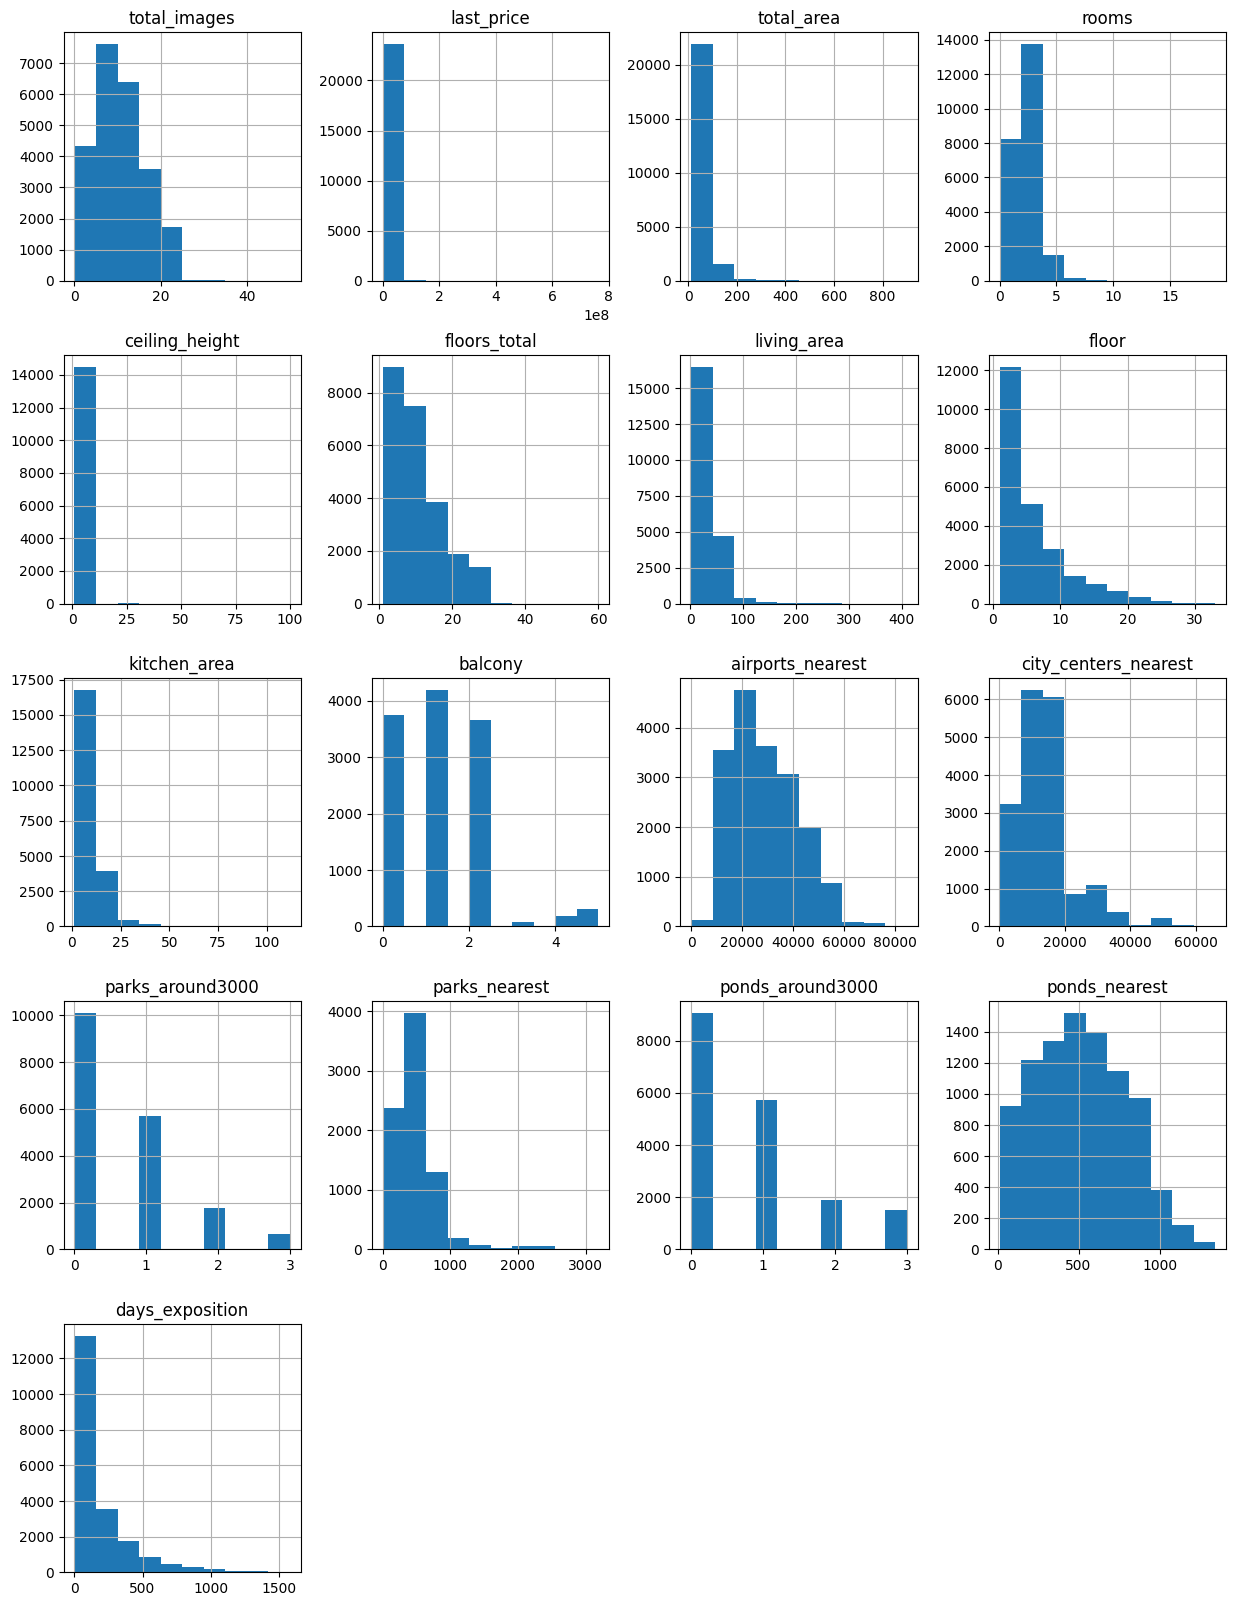

In [7]:
data.hist(figsize=(15, 20)) # построение общей гистограммы
plt.show()

In [8]:
data.describe() # вывод основных значений

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


__ВЫВОД__


Импортирована библиотека pandas  и прочитан датасет (добавлен разделитель \t, чтобы не склеивались данные). Выведена общая информация о датасете, исправлено наименование столбца 'cityCenters_nearest' на 'city_сenters_nearest'. Изучены типы данных в столбцах для дальнейшей обработки данных. Выведены гистограмы для наглядного представления данных. При помощи метода .describe() изучена основная информация (минимальные и максимальные значения) для дальнейшей обработки данных и удаления строк с аномальными значениями.

### Предобработка данных

__Проверка датасета на дубликаты__

In [9]:
data.duplicated().sum() # проверка на дубликаты

0

__Обработка пропусков и неявных дубликатов__

In [10]:
data.isna().sum() # общее количество пропусков по столбцам

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_centers_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

__Мы наблюдаем пропуски в 13 столбцах. Всего в датасете 23699 строки. Так как в столбцах "floors_total" всего 86 пропусков а столбце "locality_name" 49 пропусков удалим строки с пропусками в данных столбцах. Пропуски в столбце "balcony" заменим 0 т.к. пропуске в данном столбце означают отсутствие балкона и приведем столбец к цельночисленному типу. Пропуски в столбце "is_apartment" заменим на False что означает "не апартаменты" и переведем из типа object в bool подобно столбцам 'studio' и 'open_plan'__

In [11]:
data = data.dropna(subset = ['locality_name', 'floors_total']) 

In [12]:
data['balcony'] = data['balcony'].fillna(0)
data['balcony'] = data['balcony'].astype('int') 

In [13]:
data['is_apartment'] = data['is_apartment'].fillna(False) 
data['is_apartment'] = data['is_apartment'].astype('bool')

In [14]:
#data.isna().sum()

__Заменим ошибки в столбце ceiling_height__

In [15]:
#data['ceiling_height'].unique()

In [16]:
data = data.replace({'ceiling_height':{25:2.5, 32:3.2, 27:2.7, 24:2.4, 26:2.6, 20:2., 22.6:2.26,
                                       27.5:2.75, 100: 10.0, 1.2:12., 1.:10.}})

__Сгрупируем данные столбцов living_area и kitchen_area по столбцу total_area т.к. жилая площадь и площадь кухни взаимосвязаны с общей площадью, а столбец ceiling_height по floors_total и заполним пропуски медианными значениями___

In [17]:
data['living_area'] = data['living_area'].fillna(data.groupby('total_area')['living_area'].transform('median'))
data['kitchen_area'] = data['kitchen_area'].fillna(data.groupby('total_area')['kitchen_area'].transform('median'))
data['ceiling_height'] = data['ceiling_height'].fillna(data.groupby('floors_total')['ceiling_height'].transform('median'))

In [18]:
data.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              1
floors_total                0
living_area               133
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area              185
balcony                     0
locality_name               0
airports_nearest         5524
city_centers_nearest     5501
parks_around3000         5500
parks_nearest           15535
ponds_around3000         5500
ponds_nearest           14529
days_exposition          3171
dtype: int64

__Удалим оставшиеся строки с пропусками в данных столбцах не заполнившихся медианой.__

In [19]:
data = data.dropna(subset=['living_area', 'ceiling_height', 'kitchen_area'])

In [20]:
data['floors_total'] = data['floors_total'].astype('int') #приведем количество этажей к цельночисленому типу

In [21]:
#data.isna().sum() #проверка

__Удалим из столбца 'ceiling_height' аномальные значения, где высота потолков больше 6 метров и меньше 2 метров  (10 строк)__

In [22]:
counter = 0
for _ in data['ceiling_height']:
    if _ > 6 or _ < 2:
        counter += 1
counter

10

In [23]:
data = data.loc[data['ceiling_height'] <= 6]
data = data.loc[data['ceiling_height'] >= 2]

In [24]:
#data.isna().sum() 

__Осталось 7 столбцов с пропусками__

__Выведем  строки только с пропусками.__

In [25]:
data_nan = lambda data: data[data.isnull().any(axis=1)] 
pd.set_option('display.max_columns', None)
data_nan(data)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.75,11,18.6,1,False,False,False,11.00,2,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12,14.4,5,False,False,False,9.10,0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.66,26,10.6,6,False,False,False,14.40,1,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.75,24,44.3,22,False,False,False,18.90,2,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.55,5,17.5,4,False,False,False,6.00,0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23694,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.70,5,73.3,3,False,False,False,13.83,0,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.55,5,38.0,4,False,False,False,8.50,0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.80,3,29.7,1,False,False,False,8.00,0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


__В таблице 19254 строки с пропусками. Из данных видно что если в столбце "parks_around3000" 0 то в столбце "parks_nearest" NaN, аналогична взаимосвязь пропусков в столбцах "ponds_around3000" и "ponds_nearest". Заменим пропуски в столбцах "parks_around3000" и "ponds_around3000" на 0, т.к. 0 будет озачать отсутсвие парка/пруда а в столбцах с растоянием до объектов оставим NaN, т.к. нули в случае с расстоянием будут неинформативны.__
__Также из таблицы видно, что если в столбце 'airports_nearest' NaN, то и в столбце "city_centers_nearest" NaN. Значит эти значения не заполнялись. Аналогично расстояниям до парка/пруда оставим NaN в этих столбцах.___


__Пропуски в столбце "days_exposition" (сколько дней было размещено объявление (от публикации до снятия)) означают что обьявление еще не снято, поэтому оставим NaN.___

In [26]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype('int')
data['ponds_around3000'] = data['ponds_around3000'].astype('int')

In [27]:
#data.isna().sum()

__Исправим неявные дубликаты в столбце 'locality_name'___

In [28]:
#data['locality_name'].unique()

In [29]:
data['locality_name'] = data['locality_name'].replace('ё', 'е', regex=True)

In [30]:
data = data.replace({'locality_name':{'Мурино' : 'поселок Мурино','деревня Кудрово': 'Кудрово', 'Коммунар': 'поселок Коммунары', 
                                      'городской поселок Павлово':'поселок городского типа Павлово',
                                      'городской поселок Лесогорский': 'поселок городского типа Лесогорский', 
                                      'коттеджный поселок Лесное': 'поселок Лесное', 
                                      'городской поселок Рощино': 'поселок городского типа Рощино', 
                                      'городской поселок Советский': 'поселок городского типа Советский', 
                                      'поселок Рябово': 'поселок городского типа Рябово',
                                      'городской поселок Мга': 'поселок городского типа Мга',
                                      'поселок станции Вещево': 'поселок при железнодорожной станции Вещево',
                                      'городской поселок Назия': 'поселок городского типа Назия', 
                                      'поселок Гарболово': 'деревня Гарболово', 
                                      'поселок станции Приветнинское': 'поселок при железнодорожной станции Приветнинское', 
                                      'Любань': 'поселок Любань','посёлок станции Громово': 'поселок Громово'}})

In [31]:
#data.info()

__Удалим аномальные значения в столбце со стоимостью объекта__

In [32]:
data = data.loc[data['last_price'] <= 25000000]
data = data.loc[data['last_price'] >= 500000]

__Удалены 0 строки в столбце 'rooms'__

In [33]:
(data['rooms'] == 0).value_counts()

False    22689
True       139
Name: rooms, dtype: int64

In [34]:
data = data.loc[data['rooms'] != 0]

__Удалены аномальные строки в столбце 'total_area'___

In [35]:
data = data.loc[data['total_area'] <= 200]
data = data.loc[data['total_area'] >= 18]

In [36]:
data = data.reset_index()

In [37]:
new_data = data # переменная для подсчета процента отчищенных данных

In [38]:
100 - (new_data.shape[0] / old_data.shape[0]) * 100 # % отчищенных данных

4.536056373686662

In [39]:
#data.info()

__ВЫВОД__

+ В первую очередь была проведена проверка на дубликаты. Дубликатов в данном датасете нет.
+ Далее проведена работа по обработке пропусков и неявных дубликатов:
   +  Всего в датасете 23699 строки.  Пропуски в 13 столбцах.
   + Так как в столбцах "floors_total" всего 86 пропусков а столбце "locality_name" 49 данные строки были удалены. 
   + Пропуски в столбце "balcony" замены 0 т.к. пропуске в данном столбце означают отсутствие балкона, столбец приведен к цельночисленному типу. 
   + Пропуски в столбце "is_apartment" замены на False что означает "не апартаменты" и переведны из типа object в bool.
   + Обработаны ошибки в столбце 'ceiling_height', удалены 4 строки с аномальными значениями, пропуски заполнены медианой, сгрупированной по количеству этажей.
   + Пропуски в столбцах "living_area" и "kitchen_area" заполнены медианой, сгрупированной по столбцу "total_area" т.к. жилая площадь и площадь кухни взаимосвязаны с общей площадью, а оставшиеся пропуски не заполненые медианой удалены.
   + Пропуски в столбцах с количеством парков/прудов заполнены 0 и приведены к типу данных integer.
   + Пропуски с растояниями до парков/прудов/аэропорта/центра города оставлены с NaN, т.к. ни заполнение 0 ни заполнение медианой/средним арифметическим не дало бы достоверной информации.
   + Пропуски в столбце "days_exposition" (сколько дней было размещено объявление (от публикации до снятия)) означают что обьявление еще не снято, поэтому оставлено NaN.
   + В столбце "locality_name" исправлены неявные дубликаты.
   + В столбцах "total_area", "rooms" и "last_price" удалены аномальные значения
   
   
___По итогам предобработки данных из 23699 строк осталось  22624 строки. Удалено 4,5 % датасета. Исправлены типы данных в столбцах, обработаны пропуски и неявные дубликаты___

### Посчитайте и добавьте в таблицу новые столбцы

__Добавим столбец с ценой одного квадратного метра__

In [40]:
data['one_square_m_cost'] = data['last_price'] / data['total_area']

__Добавим столбцы с днем недели, месяцем и годом__

In [41]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [42]:
data['week_day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year

__Добавим столбец в котором будет указываться тип этажа: первый, последний или другой__

In [43]:
data['floor_type'] = 'другой'
data['floor_type'] = data['floor_type'].where(data['floor'] > 1, 'первый')
data['floor_type'] = data['floor_type'].where(data['floor'] < data['floors_total'], 'последний')

__Переведем расстояние до центра из метров в километры и добавим в новый столбец__

In [44]:
data['center_nearest_km'] = (data['city_centers_nearest'] / 1000).round(decimals=0)

__Вывод__

На данном этапе мы добавили в таблицу следующие столбцы:
+ 'one_square_m_cost' - цена одного квадратного метра 
+ 'week_day' - день недели размещения обьявления
+ 'month' - месяц размещения обьявления
+ 'year' - год размещения обьявления
+ 'floor_type' - тип этажа: первый, последний или другой
+ 'center_nearest_km' - растояние от центра в км.


### Проведите исследовательский анализ данных

+ __Построим гистограмму по столбцу 'total_area' и исследуем общую площадь___

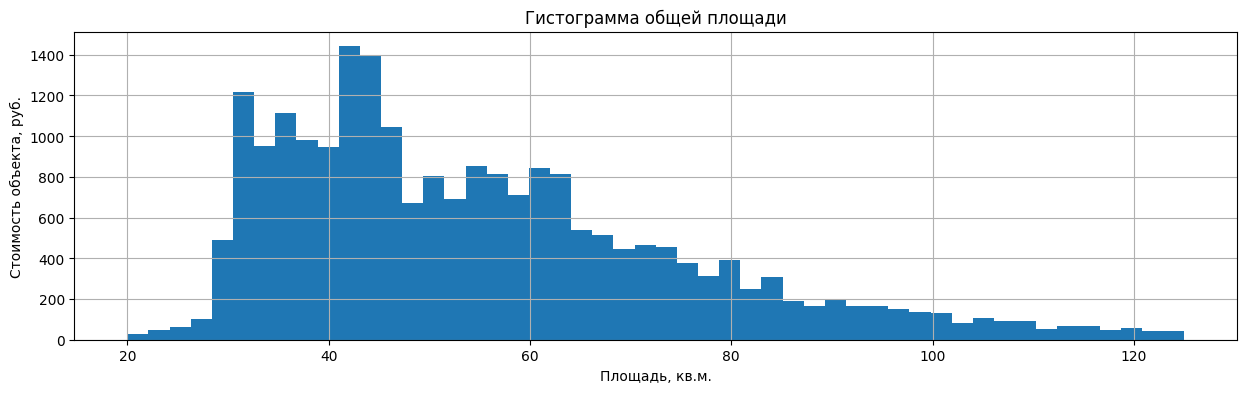

In [45]:
data['total_area'].hist(bins = 50, figsize = (15, 4), range=(20, 125))
plt.title('Гистограмма общей площади')
plt.xlabel('Площадь, кв.м.')
plt.ylabel('Стоимость объекта, руб.')
plt.show()

In [46]:
data['total_area'].describe()

count    22624.000000
mean        57.343460
std         24.373198
min         18.000000
25%         40.000000
50%         51.500000
75%         68.000000
max        200.000000
Name: total_area, dtype: float64

In [47]:
data['total_area'].value_counts().head(5)

45.0    417
42.0    382
60.0    346
44.0    343
31.0    339
Name: total_area, dtype: int64

___Наибольшее количество обьявлений приходится на квартиры площадью около 45 кв.м. Основную массу составляют квартиры с площадью от 30 до 65 кв.м. Самая маленькая квартира 18 кв.м. Вся недвижимость до 30 и более 100 кв.м. является редкой.___



+ __Жилая площадь__

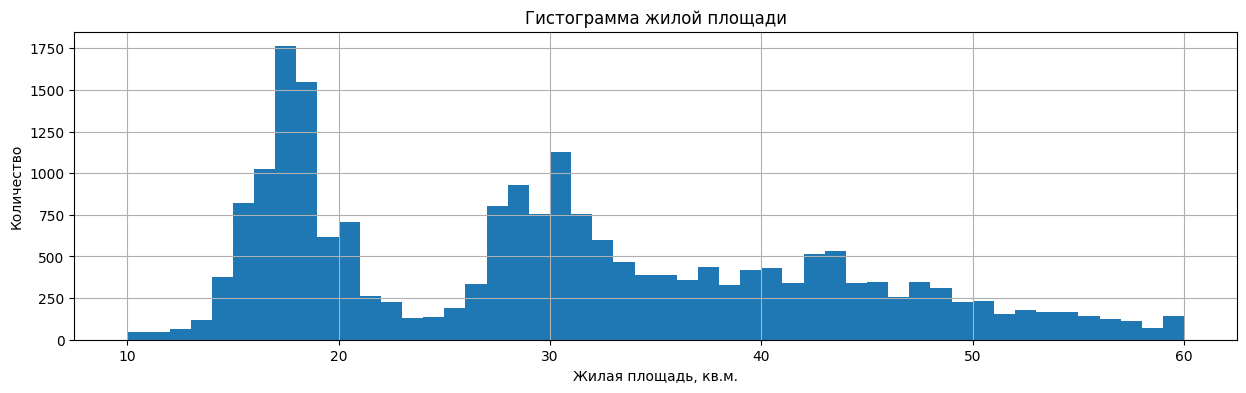

In [48]:
data['living_area'].hist(bins=50, figsize=(15,4), range=(10,60))
plt.title('Гистограмма жилой площади')
plt.xlabel('Жилая площадь, кв.м.')
plt.ylabel('Количество')
plt.show()

In [49]:
data['living_area'].describe()

count    22624.000000
mean        32.886650
std         16.438967
min          2.000000
25%         18.600000
50%         30.000000
75%         42.000000
max        164.700000
Name: living_area, dtype: float64

In [50]:
data['living_area'].value_counts().head(5)

18.0    939
17.0    738
30.0    659
28.0    496
16.0    482
Name: living_area, dtype: int64

__Жилая площадь квартиры чаще всего составляет 17 - 18 кв.м. Основная масса квартир в обьявлениях имеет жилую площадь от 18 до 42,3 кв.м., однако редко встречаются обьявления с жил.площадью около 25 кв.м.  Также редко встречаются обьявления, где жил.площадь больше 50 кв.м. и меьше 15 кв.м. Максимальный размер жилой площади в обьявлениях составляет 164,7 кв.м.__ 

+ __Площадь кухни__

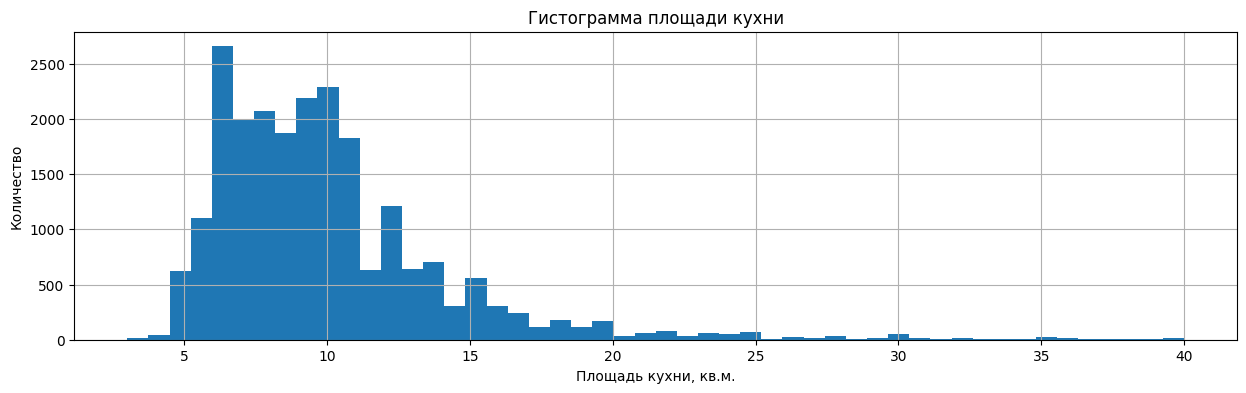

In [51]:
data['kitchen_area'].hist(bins=50, figsize=(15,4), range=(3,40))
plt.title('Гистограмма площади кухни')
plt.xlabel('Площадь кухни, кв.м.')
plt.ylabel('Количество')
plt.show()

In [52]:
data['kitchen_area'].describe()

count    22624.000000
mean        10.107888
std          4.786474
min          1.300000
25%          7.000000
50%          9.000000
75%         11.492500
max         65.000000
Name: kitchen_area, dtype: float64

In [53]:
data['kitchen_area'].value_counts().head(7)

10.0    1436
6.0     1388
9.0     1346
8.0     1243
7.0     1158
11.0     811
12.0     671
Name: kitchen_area, dtype: int64

__Самыми распространенными являются кухни  размерами 6-10 кв.м. Начиная с 11 кв.м. количество обьявлений начинает снижатся. Также мало обьявлений с кухнями до 5 кв.м. Обявления с площадью кухни больше 20 кв.м. самые редкие.__

+ __Стоимость недвижимости__

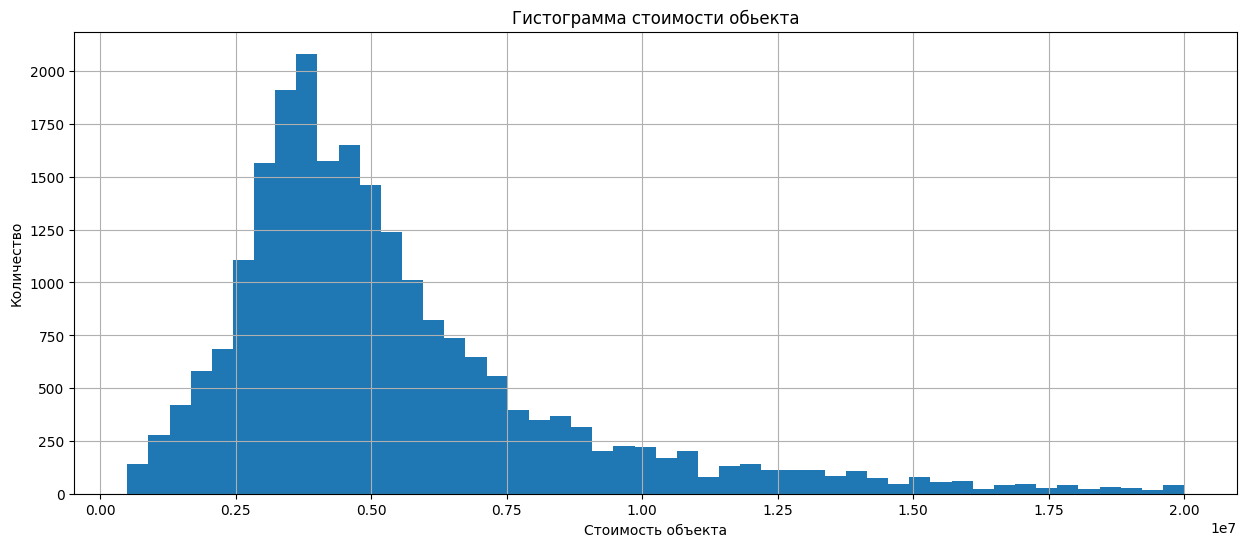

In [54]:
data['last_price'].hist(bins=50, figsize=(15,6), range=(500000, 20000000))
plt.title('Гистограмма стоимости обьекта')
plt.xlabel('Стоимость объекта')
plt.ylabel('Количество')
plt.show()

In [55]:
data['last_price'].describe() / 1000000

count     0.022624
mean      5.581596
std       3.563107
min       0.500000
25%       3.418250
50%       4.600000
75%       6.576250
max      25.000000
Name: last_price, dtype: float64

__Средняя цена на недвижимость составляет около 5,6 млн., наибольшее количество объявлений находится в диапазоне от 2,5 до 6,5 млн. Цена самой дорогой квартиры 25 млн. Начиная с 7 млн. количество обьявлений снижается.__

+ __Количество комнат__

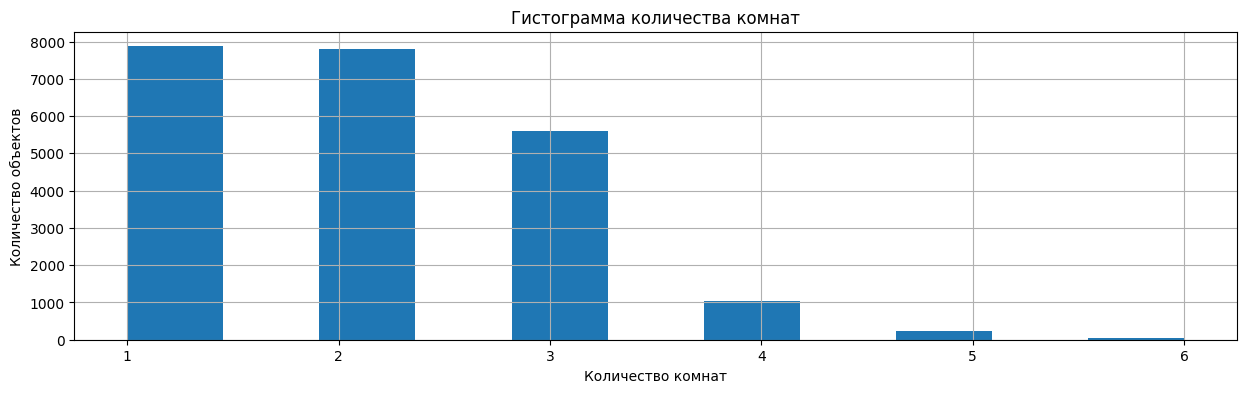

In [56]:
data['rooms'].hist(bins = data['rooms'].max(), figsize=(15,4), range=(1, 6))
plt.title('Гистограмма количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Количество объектов')
plt.show()

In [57]:
data['rooms'].value_counts().head(5)

1    7871
2    7803
3    5604
4    1044
5     228
Name: rooms, dtype: int64

__Наибольшее количество объявлений о продаже 1 и 2х комнатных квартир. Квартиры с количеством комнат больше 4 являются редкими.__

+ __Высота потолков__

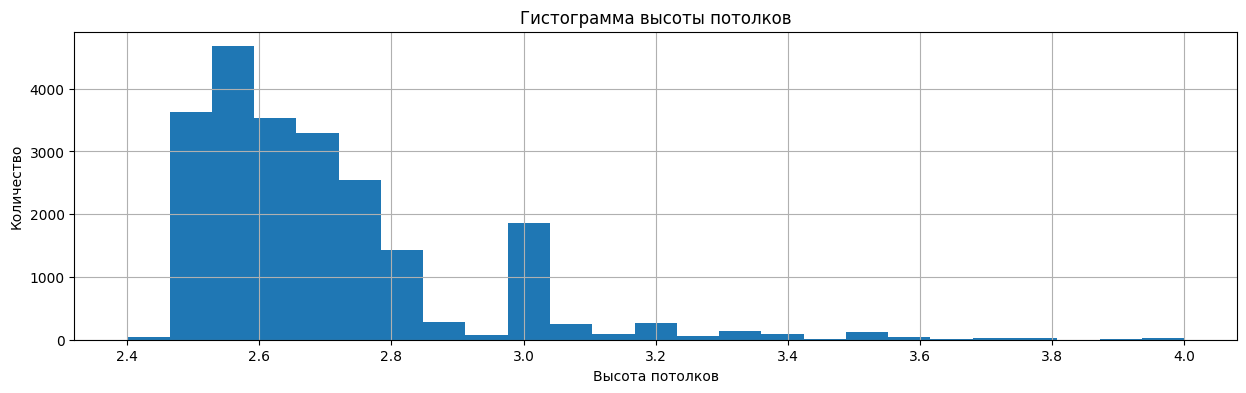

In [58]:
data['ceiling_height'].hist(bins=25, figsize=(15,4), range=(2.4, 4))
plt.title('Гистограмма высоты потолков')
plt.xlabel('Высота потолков')
plt.ylabel('Количество')
plt.show()

In [59]:
data['ceiling_height'].describe()

count    22624.000000
mean         2.697740
std          0.219193
min          2.000000
25%          2.550000
50%          2.650000
75%          2.750000
max          5.300000
Name: ceiling_height, dtype: float64

__Средняя высота потолков равна 2,7 м. В основном высота потолков равна 2,5 - 2,7 м и 3 м. Потолки выше 3 м. встречаются редко.__

+ __Этаж__

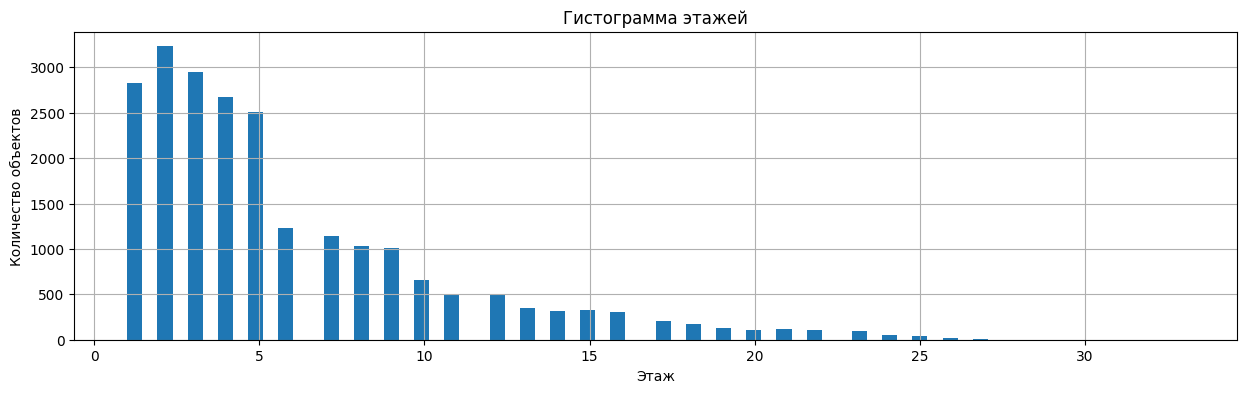

In [60]:
data['floor'].hist(bins=70, figsize=(15,4), range=(1, 33))
plt.title('Гистограмма этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')
plt.show()

In [61]:
data['floor'].value_counts().head(5)

2    3231
3    2949
1    2830
4    2676
5    2505
Name: floor, dtype: int64

__Самыми распространенными являются квартиры на 2 и 3 этаже. 3 место занимают квартиры на 1 этаже. Больше всего продается квартир с 1 по 5 этаж. Далее количество объявлений падает вместе с повышением этажа квартиры.__

+ __Тип этажа__

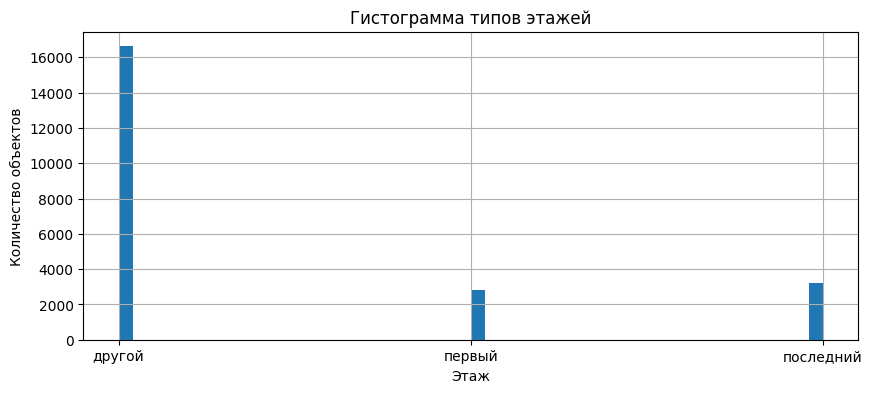

In [62]:
data['floor_type'].hist(bins=50, figsize=(10,4))
plt.title('Гистограмма типов этажей')
plt.xlabel('Этаж')
plt.ylabel('Количество объектов')
plt.show()

In [63]:
data['floor_type'].value_counts()

другой       16622
последний     3196
первый        2806
Name: floor_type, dtype: int64

__Наименьшее количество обьявлений о продаже квартир на первом этаже. Чуть больше обьявлений на последнем этаже. Основную массу составляют обьявления на промежуточных этажах (16622 шт.).__

+ __Количество этажей в доме__

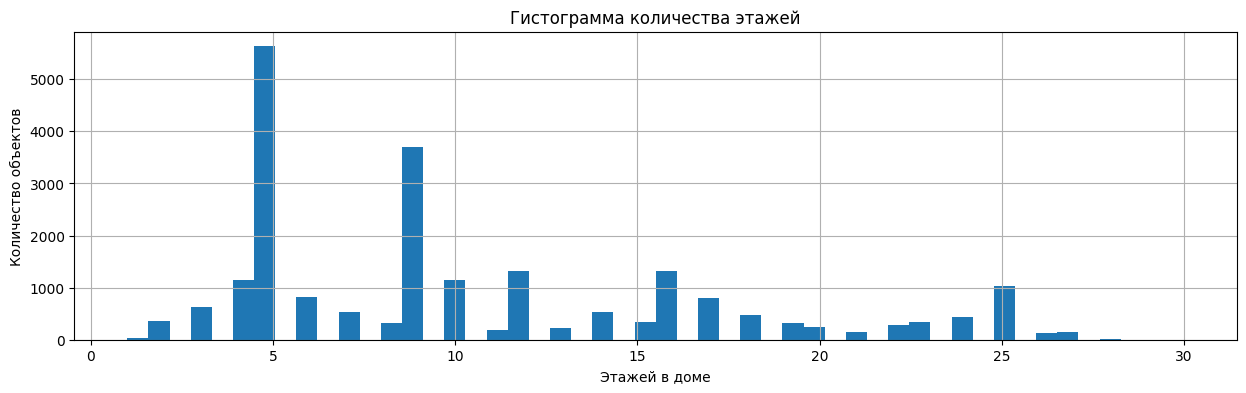

In [64]:
data['floors_total'].hist(bins=50, figsize=(15,4), range=(1, 30))
plt.title('Гистограмма количества этажей')
plt.xlabel('Этажей в доме')
plt.ylabel('Количество объектов')
plt.show()

In [65]:
data['floors_total'].describe()

count    22624.000000
mean        10.649664
std          6.576448
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

__Наибольшее количество обьявлений о продаже квартир в 5, 9 этажных домах. Также достаточно обьявлений в 4, 10, 12, 16 и 25 этажных домах. Остальные типы домов встречаются реже.__

+ __Расстояние до центра города в метрах__

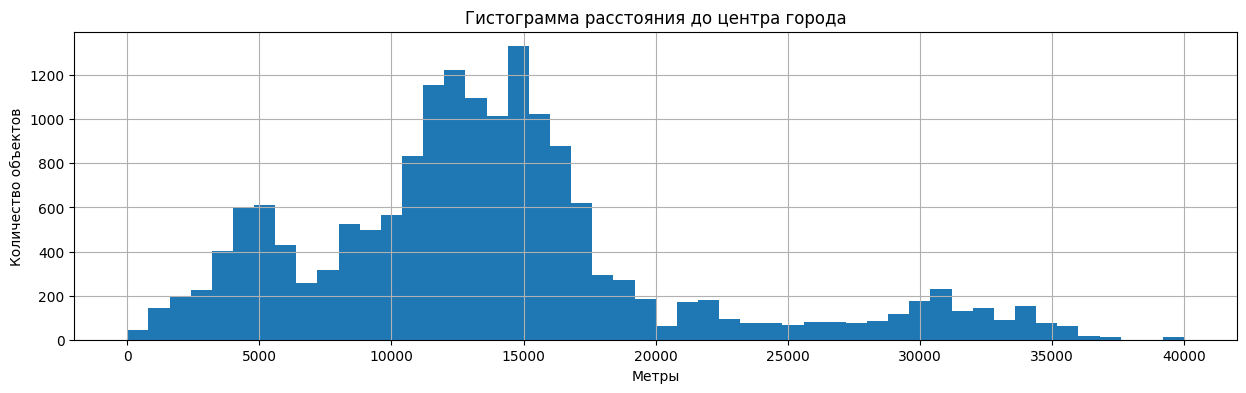

In [66]:
data['city_centers_nearest'].hist(bins=50, figsize=(15,4), range=(0, 40000))
plt.title('Гистограмма расстояния до центра города')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

In [67]:
data['city_centers_nearest'].describe()

count    17299.000000
mean     14435.526736
std       8613.148832
min        208.000000
25%       9717.500000
50%      13242.000000
75%      16407.500000
max      65968.000000
Name: city_centers_nearest, dtype: float64

__Самая близкая к центру квартира находится на расстоянии 208 м. Наибольшее количество квартир находится на расстоянии 15 км. от центра. Основную массу составляют квартиры находящиеся на расстоянии от 4 до 17 км.__

+ __Расстояние до ближайшего аэропорта__

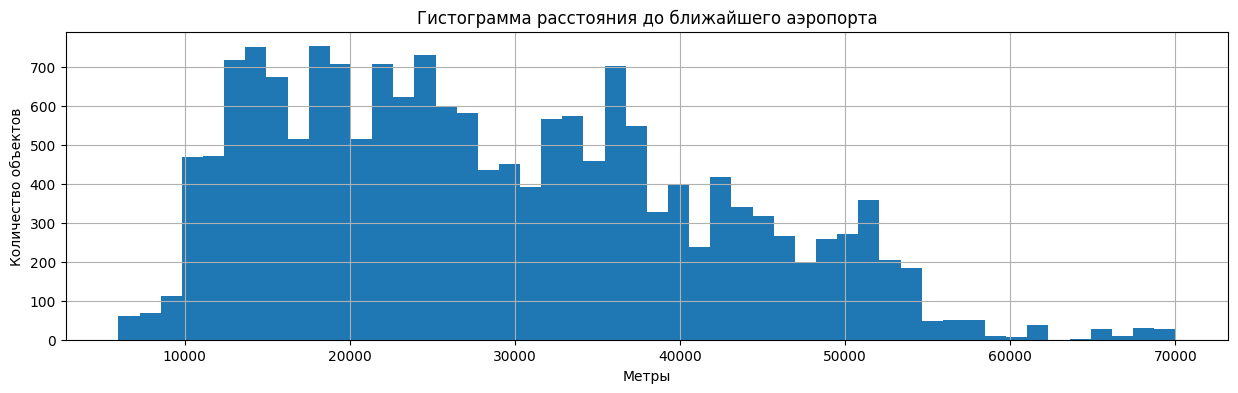

In [68]:
data['airports_nearest'].hist(bins=50, figsize=(15,4), range=(6000, 70000))
plt.title('Гистограмма расстояния до ближайшего аэропорта')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

In [69]:
data['airports_nearest'].describe()

count    17281.000000
mean     28867.571321
std      12763.452181
min          0.000000
25%      18428.000000
50%      26886.000000
75%      37412.000000
max      84869.000000
Name: airports_nearest, dtype: float64

__Основная массса недвижимости расположена на расстоянии от 18 до 37 км. В радиусе 10 км. а также дальше 55 км. находится небольшой обьем недвижимости.__

+ __Расстояние до ближайшего парка__

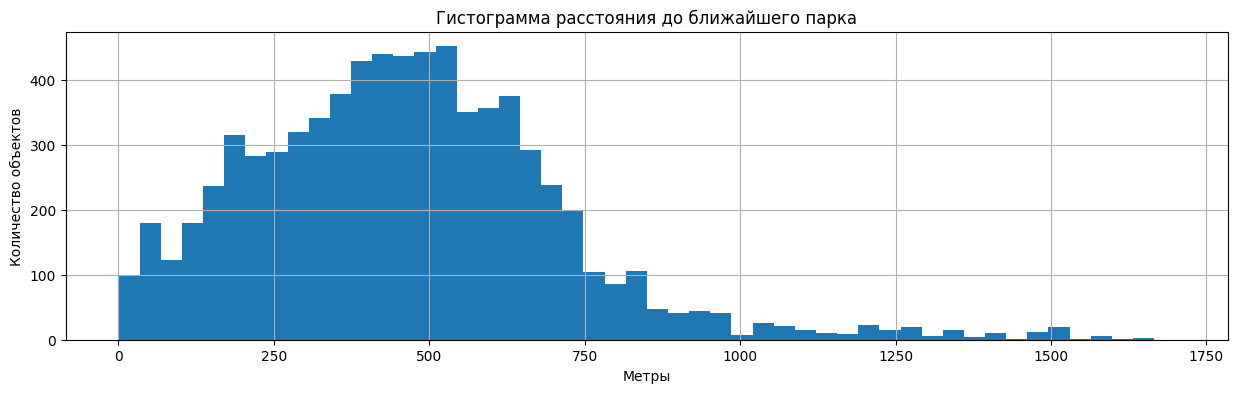

In [70]:
data['parks_nearest'].hist(bins=50, figsize=(15,4), range=(0,1700))
plt.title('Гистограмма расстояния до ближайшего парка')
plt.xlabel('Метры')
plt.ylabel('Количество объектов')
plt.show()

In [71]:
data['parks_nearest'].describe()

count    7572.000000
mean      493.279054
std       341.022874
min         1.000000
25%       290.000000
50%       456.000000
75%       614.000000
max      3190.000000
Name: parks_nearest, dtype: float64

__В 7572 обьявлениях о продаже квартир рядом с которыми располагаются парки среднее растояние до них составляет около 500 метров. В основном расстояние не превышает 750 метров, однако есть обьявления в которых расстояние до парка составляет 3,2 км.__

+ __День и месяц публикации обьявления__

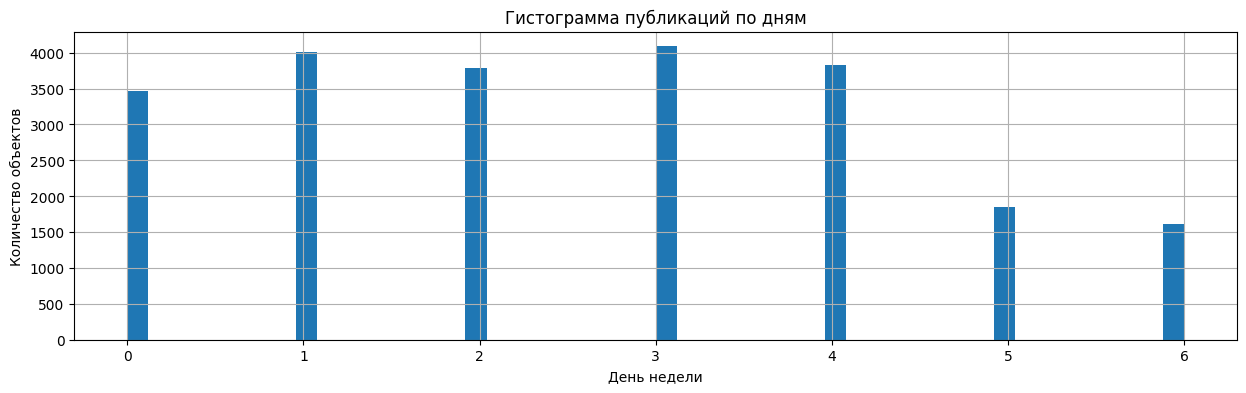

In [72]:
data['week_day'].hist(bins = 50, figsize=(15, 4))
plt.title('Гистограмма публикаций по дням')
plt.xlabel('День недели')
plt.ylabel('Количество объектов')
plt.show()

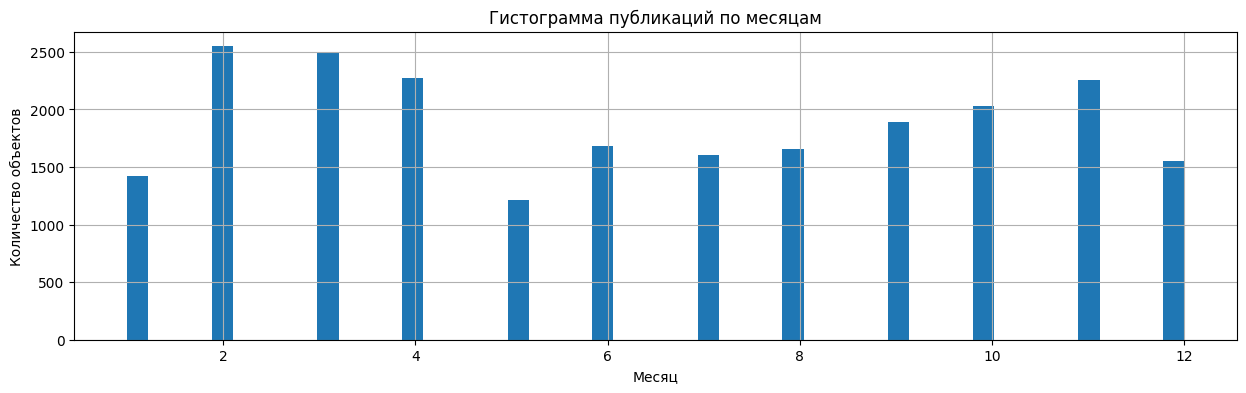

In [73]:
data['month'].hist(bins = 50, figsize=(15, 4))
plt.title('Гистограмма публикаций по месяцам')
plt.xlabel('Месяц')
plt.ylabel('Количество объектов')
plt.show()

__В буднии дни выставляется основная масса объявлений. Наиболее популярный день подачи обьявления - четверг. В выходные дни количество размещенных обьявлений сокращается в половину.
В основном продавцы выставляют обьявления с февраля по апрель и в ноябре. Наименьшее количество обьявлений приходится на май и январь. Также следует отметить тенденцию роста числа обьявлений с июня по ноябрь.__

__ВЫВОД__

+ Наибольшее количество обьявлений приходится на квартиры площадью около 45 кв.м. Основную массу составляют квартиры с площадью от 30 до 65 кв.м. Самая маленькая квартира 18 кв.м. Вся недвижимость до 30 и более 100 кв.м. является редкой.
+ Жилая площадь квартиры чаще всего составляет 17 - 18 кв.м. Основная масса квартир в обьявлениях имеет жилую площадь от 18 до 42,3 кв.м., однако редко встречаются обьявления с жил.площадью около 25 кв.м.  Также редко встречаются обьявления, где жил.площадь больше 50 кв.м. и меьше 15 кв.м. Максимальный размер жилой площади в обьявлениях составляет 164,7 кв.м.
+ Самыми распространенными являются кухни  размерами 6-10 кв.м. Начиная с 11 кв.м. количество обьявлений начинает снижатся.Также мало обьявлений с кухнями до 5 кв.м. Обявления с площадью кухни больше 20 кв.м. самые редкие.
+ Средняя цена на недвижимость составляет около 5,6 млн., наибольшее количество объявлений находится в диапазоне от 2,5 до 6,5 млн. Цена самой дорогой квартиры 25 млн. Начиная с 7 млн. количество обьявлений снижается.
+ Наибольшее количество объявлений о продаже 1 и 2х комнатных квартир. Квартиры с количеством комнат больше 4 являются редкими.
+ Средняя высота потолков равна 2,7 м. В основном высота потолков равна 2,5 - 2,7 м и 3 м. Потолки выше 3 м. встречаются редко.
+ Самыми распространенными являются квартиры на 2 и 3 этаже. 3 место занимают квартиры на 1 этаже. Больше всего продается квартир с 1 по 5 этаж. Далее количество объявлений падает (чем выше этаж, тем меньше объявлений).
+ Наименьшее количество обьявлений о продаже квартир на первом этаже. Чуть больше обьявлений на последнем этаже. Основную массу составляют обьявления на промежуточных этажах (16622 шт.).
+ Наибольшее количество обьявлений о продаже квартир в 5, 9 этажных домах. Также достаточно обьявлений в 4, 10, 12, 16 и 25 этажных домах. Остальные типы домов встречаются реже.
+ Самая близкая к центру квартира находится на расстоянии 208 м. Наибольшее количество квартир находится на расстоянии 15 км. от центра. Основную массу составляют квартиры находящиеся на расстоянии от 4 до 17 км.
+ Основная массса недвижимости расположена на расстоянии от 18 до 37 км от аэропорта. В радиусе 10 км. а также дальше 55 км. находится небольшой обьем недвижимости.
+ В 7572 обьявлениях о продаже квартир рядом с которыми располагаются парки среднее растояние до них составляет около 500 метров. В основном расстояние не превышает 750 метров, однако есть обьявления в которых расстояние до парка составляет 3,2 км.
+ В буднии дни выставляется основная масса объявлений. Наиболее популярный день подачи обьявления - четверг. В выходные дни количество размещенных обьявлений сокращается в половину.
+ В основном продавцы выставляют обьявления с февраля по апрель и в ноябре. Наименьшее количество обьявлений приходится на май и январь. Также следует отметить тенденцию роста числа размещенных обьявлений с июня по ноябрь. Также мало обьявлений с кухнями до 5 кв.м. Обявления с площадью кухни больше 20 кв.м. самые редкие.
+ Средняя цена на недвижимость составляет около 5,6 млн., наибольшее количество объявлений находится в диапазоне от 2,5 до 6,5 млн. Цена самой дорогой квартиры 25 млн. Начиная с 7 млн. количество обьявлений снижается.
+ Наибольшее количество объявлений о продаже 1 и 2х комнатных квартир. Квартиры с количеством комнат больше 4 являются редкими.
+ Средняя высота потолков равна 2,7 м. В основном высота потолков равна 2,5 - 2,7 м и 3 м. Потолки выше 3 м. встречаются редко.
+ Самыми распространенными являются квартиры на 2 и 3 этаже. 3 место занимают квартиры на 1 этаже. Больше всего продается квартир с 1 по 5 этаж. Далее количество объявлений падает (чем выше этаж, тем меньше объявлений).
+ Наименьшее количество обьявлений о продаже квартир на первом этаже. Чуть больше обьявлений на последнем этаже. Основную массу составляют обьявления на промежуточных этажах (16622 шт.).
+ Наибольшее количество обьявлений о продаже квартир в 5, 9 этажных домах. Также достаточно обьявлений в 4, 10, 12, 16 и 25 этажных домах. Остальные типы домов встречаются реже.
+ Самая близкая к центру квартира находится на расстоянии 208 м. Наибольшее количество квартир находится на расстоянии 15 км. от центра. Основную массу составляют квартиры находящиеся на расстоянии от 4 до 17 км.
+ Основная массса недвижимости расположена на расстоянии от 18 до 37 км от аэропорта. В радиусе 10 км. а также дальше 55 км. находится небольшой обьем недвижимости.
+ В 7572 обьявлениях о продаже квартир рядом с которыми располагаются парки среднее растояние до них составляет около 500 метров. В основном расстояние не превышает 750 метров, однако есть обьявления в которых расстояние до парка составляет 3,2 км.
+ В буднии дни выставляется основная масса объявлений. Наиболее популярный день подачи обьявления - четверг. В выходные дни количество размещенных обьявлений сокращается в половину.
+ В основном продавцы выставляют обьявления с февраля по апрель и в ноябре. Наименьшее количество обьявлений приходится на май и январь. Также следует отметить тенденцию роста числа размещенных обьявлений с июня по ноябрь.

__Как быстро продавались квартиры?__

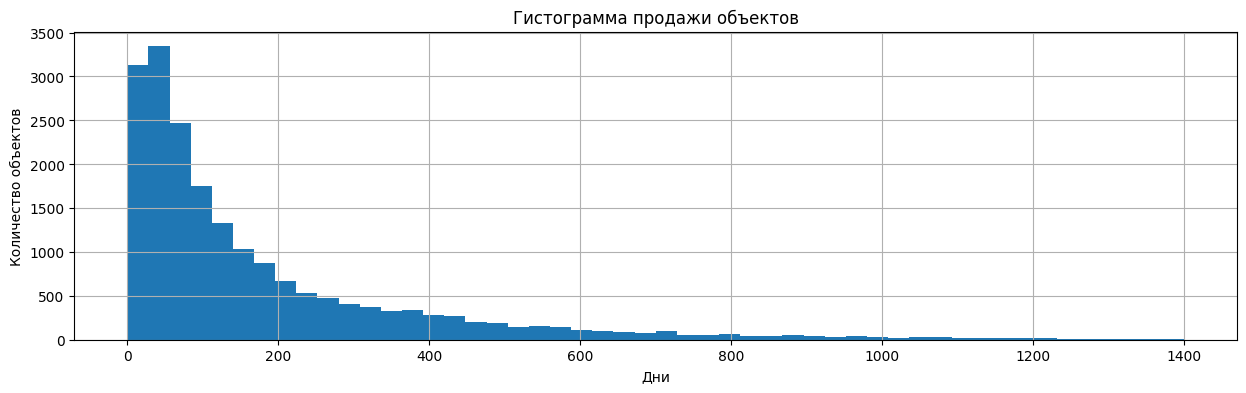

In [74]:
data['days_exposition'].hist(bins=50, figsize=(15,4), range=(0,1400))
plt.title('Гистограмма продажи объектов')
plt.xlabel('Дни')
plt.ylabel('Количество объектов')
plt.show()

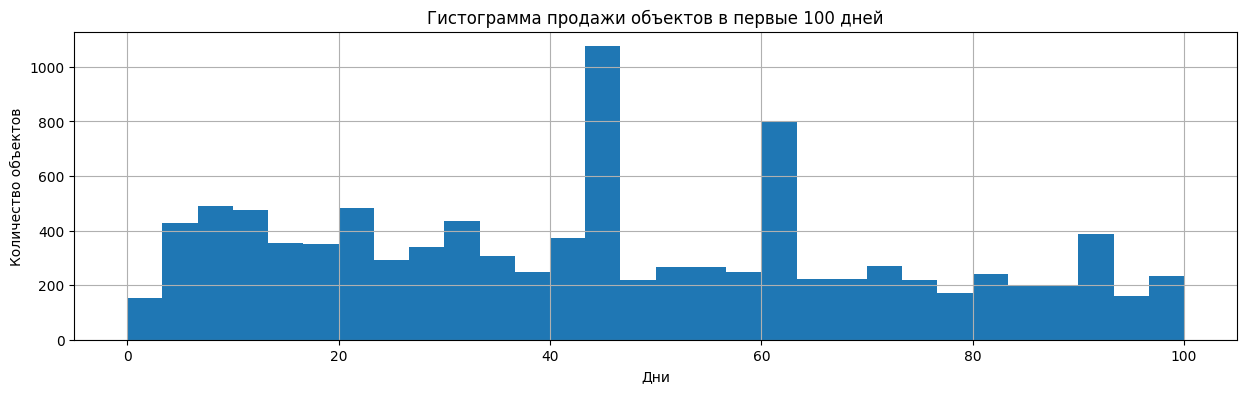

In [75]:
data['days_exposition'].hist(bins=30, figsize=(15,4), range=(0,100))
plt.title('Гистограмма продажи объектов в первые 100 дней')
plt.xlabel('Дни')
plt.ylabel('Количество объектов')
plt.show()

In [76]:
data['days_exposition'].describe()

count    19622.000000
mean       179.258027
std        217.385280
min          1.000000
25%         45.000000
50%         95.000000
75%        229.000000
max       1580.000000
Name: days_exposition, dtype: float64

__ВЫВОД__


Чаще всего недвижимость продается в течение 45 дней. В среднем длительность продажи составляет 181 день. Быстрыми можно считать продажи состоявшиеся в первый месяц размещения обьявления. Долгой продажу можно считать если количество дней размещения обьявления превышает 500 дней (около года и больше) (таких обьявлений меньшинство).

__Какие факторы больше всего влияют на общую (полную) стоимость обьекта?__

__Взаимосвязь цены и площади объекта__

In [77]:
data['last_price'].corr(data['total_area'])
# Коэфицент корреляции близится к 1 т.е. отмечается высокая степень связи между переменными

0.7799642708669733

In [78]:
price_area = data.pivot_table(index='total_area', values='last_price', aggfunc='median')

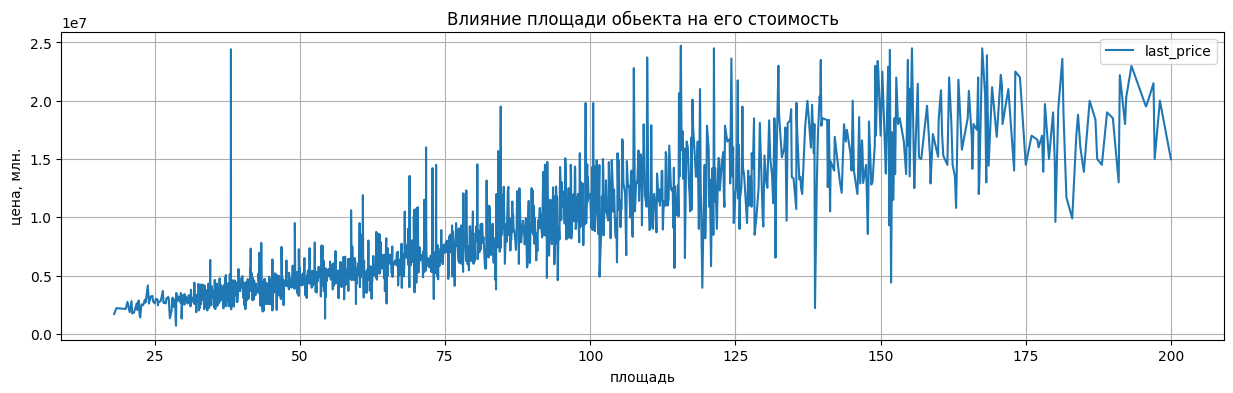

In [79]:
price_area.plot(
    style='-', grid=True, figsize=(15, 4), xlabel = 'площадь', ylabel = 'цена, млн.', 
    title = 'Влияние площади обьекта на его стоимость'
)
plt.show()

__Исходя из графика мы видим зависимость между стоимостью недвижимости и ее площадью, а именно чем больше площадь тем выше цена объекта.__

__Взаимосвязь цены и жилой площади обьекта__

In [80]:
data['last_price'].corr(data['living_area'])
# Взаимосвязь чуть менее сильная чем с общей площадью

0.6698522429628274

In [81]:
price_living_area = data.pivot_table(index='living_area', values='last_price', aggfunc='median')

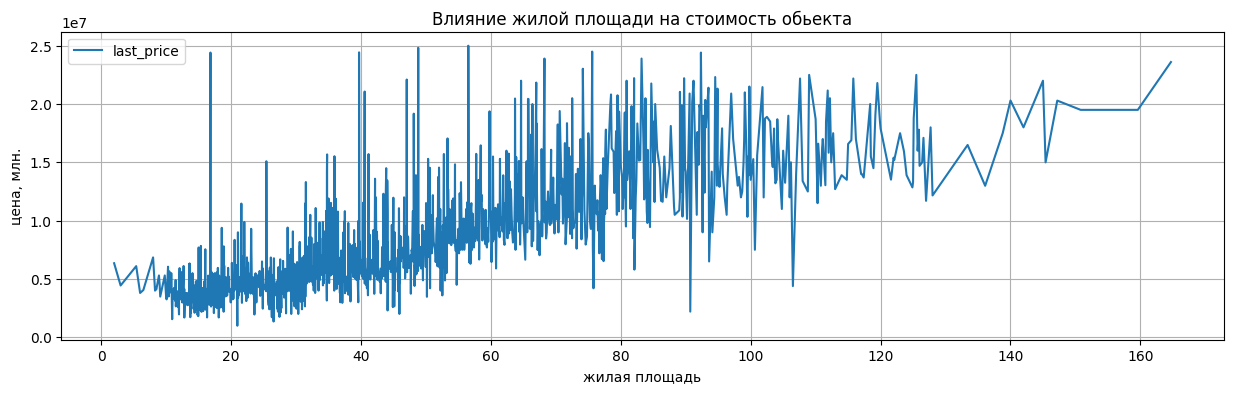

In [82]:
price_living_area.plot(
    style='-', grid=True, figsize=(15, 4), xlabel = 'жилая площадь', ylabel = 'цена, млн.',
    title = 'Влияние жилой площади на стоимость обьекта'
)
plt.show()

__Взаимосвязь аналогична предыдущему исследованию, т.е. чем больше площадь тем выше цена.__

__Взвимосвязь цены и площади кухни / количества комнат__

In [83]:
data['last_price'].corr(data['kitchen_area'])
# Взаимосвязь в данном случае  чуть меньше чем с общей и жилой площадью

0.5909142215900866

In [84]:
price_kitchen = data.pivot_table(index='kitchen_area', values='last_price', aggfunc='median')

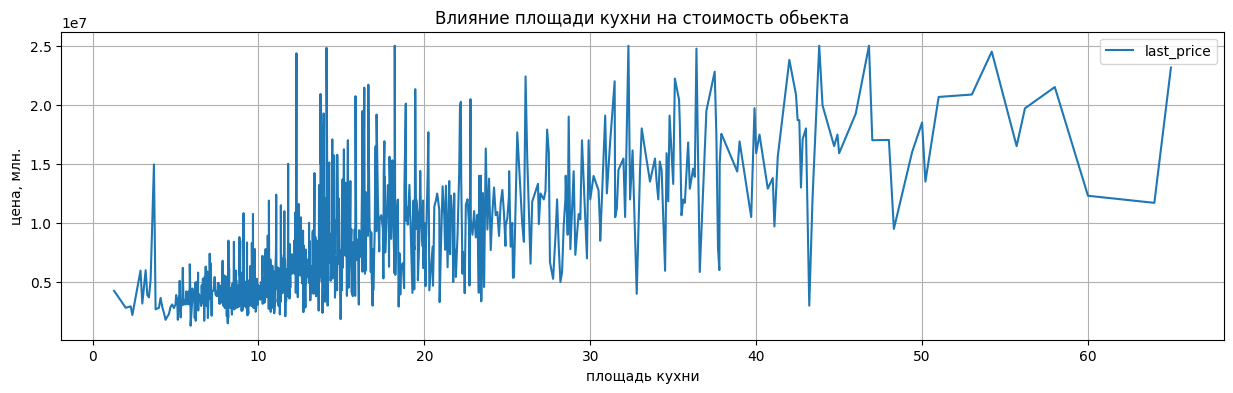

In [85]:
price_kitchen.plot(
    style='-', grid=True, figsize=(15, 4), xlabel = 'площадь кухни', ylabel = 'цена, млн.', 
    title = 'Влияние площади кухни на стоимость обьекта'
)
plt.show()

__Взаимосвязь аналогична предыдущим двум исследованиям, но уже намного слабее__

In [86]:
data['last_price'].corr(data['rooms'])
# коэфицент корреляции близок к 0, взаимосвязи нет

0.4952977483890871

In [87]:
price_rooms = data.pivot_table(index='rooms', values='last_price', aggfunc='median')

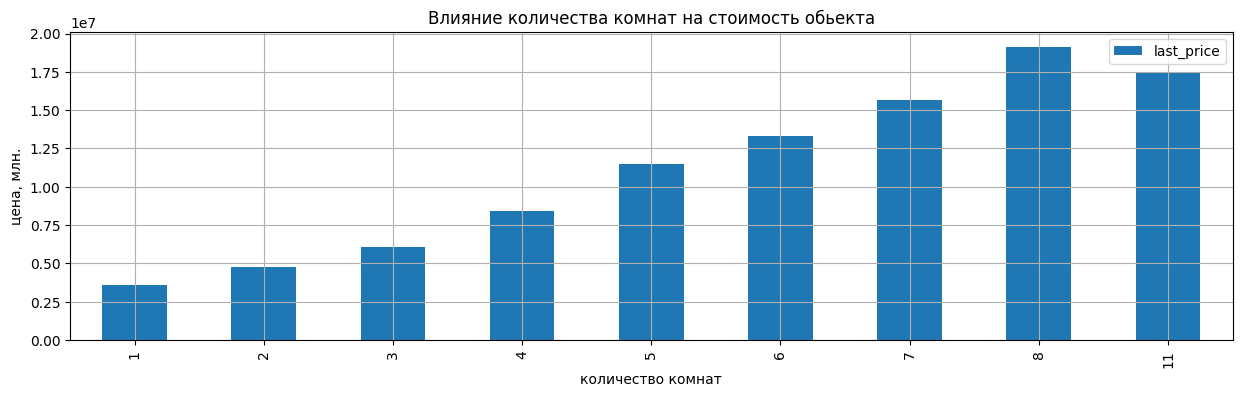

In [88]:
price_rooms.plot(
    grid=True, figsize=(15, 4), xlabel = 'количество комнат', ylabel = 'цена, млн.', 
    kind = 'bar', title = 'Влияние количества комнат на стоимость обьекта'
)
plt.show()

__Чем больше комнат, тем выше цена. Это логично, т.к. увеличивается площадь обьекта и, следовательно стоимость.__

__Взаимосвязь цены и типа этажа__

In [89]:
price_floor_type = data.pivot_table(index='floor_type', values='last_price', aggfunc='median')
price_floor_type
#Коэфицент корреляции неизвестен из-за типа столбца "floor_type", построим сводную таблицу заполненую 
#медианными значениями по типам этажей

,last_price
floor_type,
другой,4800000.0
первый,3900000.0
последний,4200000.0


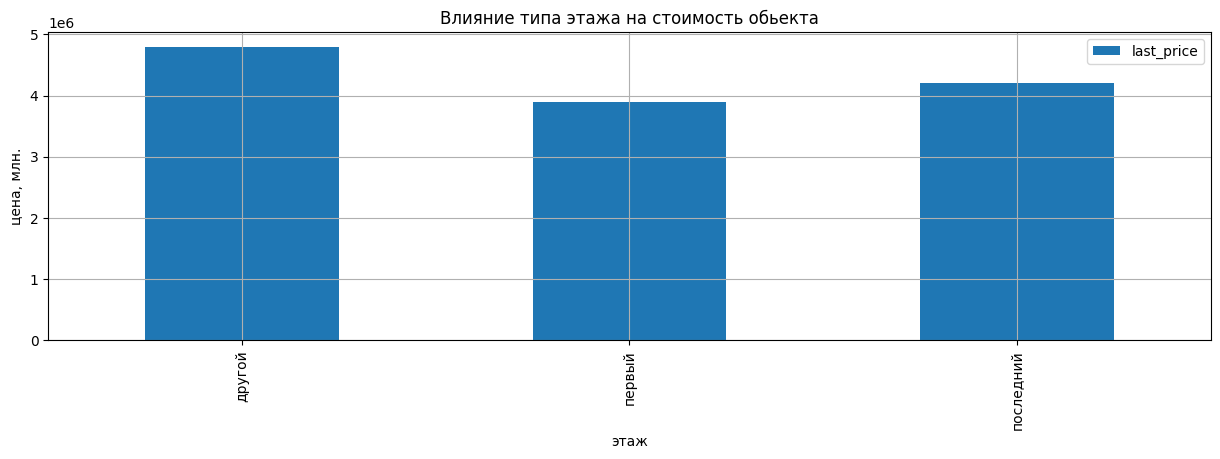

In [90]:
price_floor_type.plot(
    grid=True, figsize=(15, 4), xlabel = 'этаж', ylabel = 'цена, млн.', kind = 'bar', 
    title = 'Влияние типа этажа на стоимость обьекта'
)
plt.show()

__Исходя из графика мы видим зависимость что если этаж квартиры не является ни первым ни последним, стоимость недвижимости  выше.__

__Взаимосвязь цены и даты размещения__

In [91]:
price_day = data.pivot_table(index='week_day', values='last_price', aggfunc='median')
price_month = data.pivot_table(index='month', values='last_price', aggfunc='median')
price_year = data.pivot_table(index='year', values='last_price', aggfunc='median')

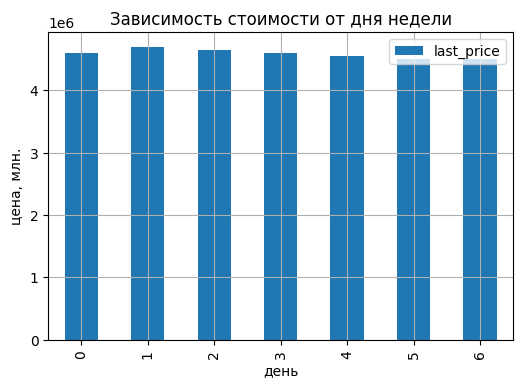

In [92]:
price_day.plot(
    grid=True, figsize=(6, 4), xlabel = "день", ylabel = 'цена, млн.' , kind = 'bar', 
    title = "Зависимость стоимости от дня недели"
)
plt.show()

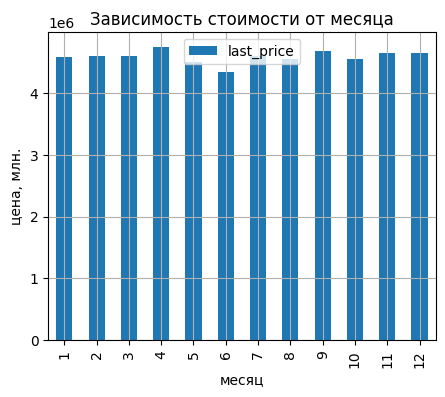

In [93]:
price_month.plot(
    grid=True, figsize=(5, 4), xlabel = "месяц", ylabel = 'цена, млн.', kind = 'bar', 
    title = "Зависимость стоимости от месяца"
)
plt.show()

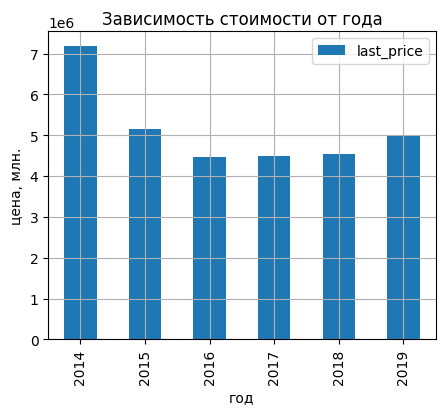

In [94]:
price_year.plot(
    grid=True, figsize=(5, 4), xlabel = "год", ylabel = 'цена, млн.', kind = 'bar', 
    title = 'Зависимость стоимости от года'
)
plt.show()

__Исходя из построенных графиков можно сказать что цена абсолютно не взаимосвязана ни с днем, ни с месяцем размещения обьявления. А из графика взаимосвязи года продажи и цены можно сделать вывод что в 2015 недвижимость упала в цене и до 2019 держится на одном уровне.__

__ВЫВОД__

+ Цена имеет сильную зависимость от общей площади объекта (более низкая взаимосвязь от отдельных частей: жилой площади и площади кухни)
+ Также на цену влияет тип этажа. На первом и последнем объекты недвижимости значительно дешевле чем на других этажах.
+ Чем больше комнат тем выше цена, это логично так как увеличивается площадь обьекта.
+ Ни день, ни месяц, ни год не влияют на цену объекта. Однако в 2015 годах недвижимость упала в цене и в дальнейшем держится на одном уровне.

__Средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.__

In [95]:
popular_city = data['locality_name'].value_counts().head(10)
popular_city

Санкт-Петербург      14901
поселок Мурино         532
Кудрово                435
поселок Шушары         435
Всеволожск             391
Пушкин                 359
Колпино                336
поселок Парголово      322
Гатчина                307
Выборг                 237
Name: locality_name, dtype: int64

In [96]:
data['popular_city'] = data['locality_name'].where(data['locality_name'].isin(popular_city.index), 'NaN')

In [97]:
popular_city_mean = data.pivot_table(index = 'popular_city', values = 'one_square_m_cost', aggfunc = 'mean')
popular_city_mean.columns = ['цена 1 кв.м.']
popular_city_mean.query("popular_city != 'NaN'").sort_values(by='цена 1 кв.м.', ascending=False).round(decimals=2)

,цена 1 кв.м.
popular_city,
Санкт-Петербург,109623.73
Пушкин,102162.14
Кудрово,94967.01
поселок Парголово,90448.42
поселок Мурино,85416.03
поселок Шушары,78277.94
Колпино,75316.75
Гатчина,68746.15
Всеволожск,68657.16


__ВЫВОД__
+ Наибольшее количество объявлений в Санкт Петербурге и поселке Мурино.
+ Самыми дорогими населенными пунктами являются Санкт-Петербург, Пушкин и Кудрово, а самыми недорогими из популярных населенных пунктов являются Гатчина, Всеволжск и Выборг.

__Санкт Петербург из данных населенных пунктов является одновременно и самым дорогим и самым популярным городом.__

__Средняя цена каждого километра в Санкт-Петербурге__

In [98]:
spb_price = data.query("locality_name == 'Санкт-Петербург'")
spb_price_km = spb_price['one_square_m_cost'].groupby(spb_price['center_nearest_km']).mean()

';'

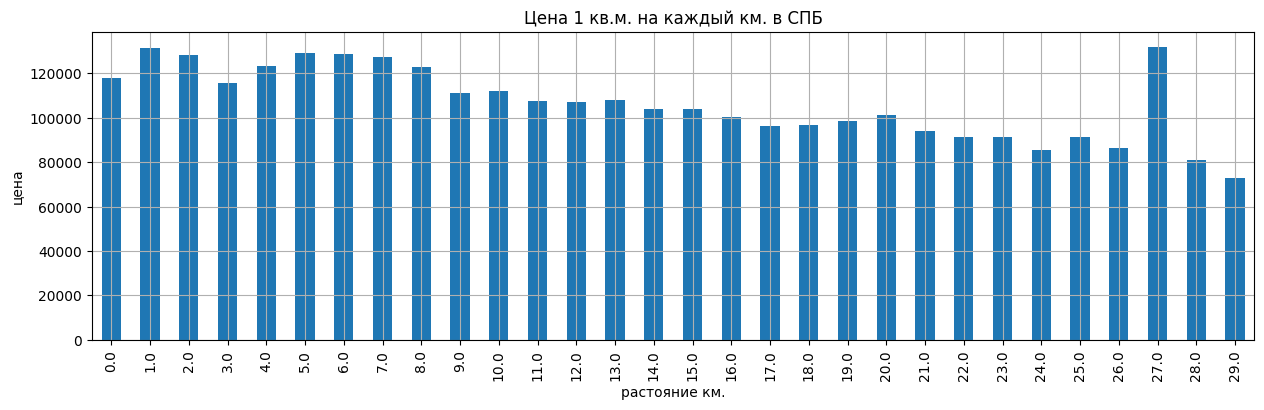

In [99]:
spb_price_km.plot(
    grid=True, figsize=(15, 4), xlabel = "растояние км.", ylabel = 'цена', kind = 'bar', 
    title = "Цена 1 кв.м. на каждый км. в СПБ"
)
";"

__Будем считать что центром являются квартиры в радиусе 2 км. от центра города. Цена за 1 кв.м. такой недвижимости составляет от 120 до 140 тыс. Виден рост в области 5-8 км. можно предположить что это цены на недвижимость в хороших районах Санкт Петербурга, тоже предположение можно сделать о 27 км. От 9 до 26 км однородные цены в районе 80-100 тыс. Дальше  28 км цена идет на спад.__

__ВЫВОД__

+ Цена за 1 кв м. в центре города находится в диапазоне от 120 до 140 тыс. 
+ 80-100 тыс. - цена 1 кв.м. на обычную квартиру в Санкт Петербурге
+ Цена 1 кв.м. в "хороших" районах примерно на 40 тыс.выше чем  цена обычной недвижимости

__ОБЩИЙ ВЫВОД__


__1. Открыт файл с данными и изучена общая информация__

+ Импортирована библиотека pandas  и прочитан датасет (добавлен разделитель \t, чтобы не склеивались данные). 
+ Выведена общая информация о датасете, исправлено наименование столбца 'cityCenters_nearest' на 'city_сenters_nearest'. 
+ Изучены типы данных в столбцах для дальнейшей обработки данных (исправления типов данных в столбцах). 
+ Выведены гистограмы для наглядного представления данных. 
+ При помощи метода .describe() изучена основная информация (минимальные и максимальные значения) для дальнейшей обработки данных и удаления строк с аномальными значениями.

__2. Предобработка данных__

+ В первую очередь была проведена проверка на дубликаты. Дубликатов в данном датасете нет.
+ Далее проведена работа по обработке пропусков и неявных дубликатов:
   +  Всего в датасете 23699 строки.  Пропуски в 13 столбцах.
   + Так как в столбцах "floors_total" всего 86 пропусков а столбце "locality_name" 49 данные строки были удалены. 
   + Пропуски в столбце "balcony" замены 0 т.к. пропуске в данном столбце означают отсутствие балкона, столбец приведен к цельночисленному типу. 
   + Пропуски в столбце "is_apartment" замены на False что означает "не апартаменты" и переведны из типа object в bool.
   + Обработаны ошибки в столбце 'ceiling_height', удалены 4 строки с аномальными значениями, пропуски заполнены медианой, сгрупированной по количеству этажей.
   + Пропуски в столбцах "living_area" и "kitchen_area" заполнены медианой, сгрупированной по столбцу "total_area" т.к. жилая площадь и площадь кухни взаимосвязаны с общей площадью, а оставшиеся пропуски не заполненые медианой удалены.
   + Пропуски в столбцах с количеством парков/прудов заполнены 0 (т.е. парков/прудов нет) и приведены к типу данных integer.
   + Пропуски с растояниями до парков/прудов/аэропорта/центра города оставлены с NaN, т.к. ни заполнение 0 ни заполнение медианой/средним арифметическим не дало бы достоверной информации.
   + Пропуски в столбце "days_exposition" (сколько дней было размещено объявление (от публикации до снятия)) означают что обьявление еще не снято, поэтому оставлено NaN.
   + В столбцах "total_area", "rooms" и "last_price" удалены аномальные значения
   + По итогам предобработки данных из 23699 строк осталось  22624 строки. 
+ Удалено 4,5 % датасета. Исправлены типы данных в столбцах, обработаны пропуски и неявные дубликаты 

__3. В таблицу добавлены новые столбцы для дальнейшего анализа:__

+ 'one_square_m_cost' - цена одного квадратного метра 
+ 'week_day' - день недели размещения обьявления
+ 'month' - месяц размещения обьявления
+ 'year' - год размещения обьявления
+ 'floor_type' - тип этажа: первый, последний или другой
+ 'center_nearest_km' - растояние от центра в км.

__4. Проведен исследовательский анализ данных:__ 

__4.1 Изучены следующие параметры объектов:__
  + общая площадь;
  + жилая площадь;
  + площадь кухни;
  + цена объекта;
  + количество комнат;
  + высота потолков;
  + этаж квартиры;
  + тип этажа квартиры («первый», «последний», «другой»);
  + общее количество этажей в доме;
  + расстояние до центра города в метрах;
  + расстояние до ближайшего аэропорта;
  + расстояние до ближайшего парка;
  + день и месяц публикации объявления.
_Построены отдельные гистограммы для каждого из этих параметров._

__В ходе иследования получены следующие результаты:__ 
+ Наибольшее количество обьявлений приходится на квартиры площадью около 45 кв.м. Основную массу составляют квартиры с площадью от 30 до 65 кв.м. Самая маленькая квартира 18 кв.м. Вся недвижимость до 30 и более 100 кв.м. является редкой.
+ Жилая площадь квартиры чаще всего составляет 17 - 18 кв.м. Основная масса квартир в обьявлениях имеет жилую площадь от 18 до 42,3 кв.м., однако редко встречаются обьявления с жил.площадью около 25 кв.м.  Также редко встречаются обьявления, где жил.площадь больше 50 кв.м. и меьше 15 кв.м. Максимальный размер жилой площади в обьявлениях составляет 164,7 кв.м.
+ Самыми распространенными являются кухни  размерами 6-10 кв.м. Начиная с 11 кв.м. количество обьявлений начинает снижатся.Также мало обьявлений с кухнями до 5 кв.м. Обявления с площадью кухни больше 20 кв.м. самые редкие.
+ Средняя цена на недвижимость составляет около 5,6 млн., наибольшее количество объявлений находится в диапазоне от 2,5 до 6,5 млн. Цена самой дорогой квартиры 25 млн. Начиная с 7 млн. количество обьявлений снижается.
+ Наибольшее количество объявлений о продаже 1 и 2х комнатных квартир. Квартиры с количеством комнат больше 4 являются редкими.
+ Средняя высота потолков равна 2,7 м. В основном высота потолков равна 2,5 - 2,7 м и 3 м. Потолки выше 3 м. встречаются редко.
+ Самыми распространенными являются квартиры на 2 и 3 этаже. 3 место занимают квартиры на 1 этаже. Больше всего продается квартир с 1 по 5 этаж. Далее количество объявлений падает (чем выше этаж, тем меньше объявлений).
+ Наименьшее количество обьявлений о продаже квартир на первом этаже. Чуть больше обьявлений на последнем этаже. Основную массу составляют обьявления на промежуточных этажах (16622 шт.).
+ Наибольшее количество обьявлений о продаже квартир в 5, 9 этажных домах. Также достаточно обьявлений в 4, 10, 12, 16 и 25 этажных домах. Остальные типы домов встречаются реже.
+ Самая близкая к центру квартира находится на расстоянии 208 м. Наибольшее количество квартир находится на расстоянии 15 км. от центра. Основную массу составляют квартиры находящиеся на расстоянии от 4 до 17 км.
+ Основная массса недвижимости расположена на расстоянии от 18 до 37 км от аэропорта. В радиусе 10 км. а также дальше 55 км. находится небольшой обьем недвижимости.
+ В 7572 обьявлениях о продаже квартир рядом с которыми располагаются парки среднее растояние до них составляет около 500 метров. В основном расстояние не превышает 750 метров, однако есть обьявления в которых расстояние до парка составляет 3,2 км.
+ В буднии дни выставляется основная масса объявлений. Наиболее популярный день подачи обьявления - четверг. В выходные дни количество размещенных обьявлений сокращается в половину.
+ В основном продавцы выставляют обьявления с февраля по апрель и в ноябре. Наименьшее количество обьявлений приходится на май и январь. Также следует отметить тенденцию роста числа размещенных обьявлений с июня по ноябрь. Также мало обьявлений с кухнями до 5 кв.м. Обявления с площадью кухни больше 20 кв.м. самые редкие.
+ Средняя цена на недвижимость составляет около 5,6 млн., наибольшее количество объявлений находится в диапазоне от 2,5 до 6,5 млн. Цена самой дорогой квартиры 25 млн. Начиная с 7 млн. количество обьявлений снижается.
+ Наибольшее количество объявлений о продаже 1 и 2х комнатных квартир. Квартиры с количеством комнат больше 4 являются редкими.
+ Средняя высота потолков равна 2,7 м. В основном высота потолков равна 2,5 - 2,7 м и 3 м. Потолки выше 3 м. встречаются редко.
+ Самыми распространенными являются квартиры на 2 и 3 этаже. 3 место занимают квартиры на 1 этаже. Больше всего продается квартир с 1 по 5 этаж. Далее количество объявлений падает (чем выше этаж, тем меньше объявлений).
+ Наименьшее количество обьявлений о продаже квартир на первом этаже. Чуть больше обьявлений на последнем этаже. Основную массу составляют обьявления на промежуточных этажах (16622 шт.).
+ Наибольшее количество обьявлений о продаже квартир в 5, 9 этажных домах. Также достаточно обьявлений в 4, 10, 12, 16 и 25 этажных домах. Остальные типы домов встречаются реже.
+ Самая близкая к центру квартира находится на расстоянии 208 м. Наибольшее количество квартир находится на расстоянии 15 км. от центра. Основную массу составляют квартиры находящиеся на расстоянии от 4 до 17 км.
+ Основная масса недвижимости расположена на расстоянии от 18 до 37 км от аэропорта. В радиусе 10 км. а также дальше 55 км. находится небольшой обьем недвижимости.
+ В 7572 обьявлениях о продаже квартир рядом с которыми располагаются парки среднее растояние до них составляет около 500 метров. В основном расстояние не превышает 750 метров, однако есть обьявления в которых расстояние до парка составляет 3,2 км.
+ В буднии дни выставляется основная масса объявлений. Наиболее популярный день подачи обьявления - четверг. В выходные дни количество размещенных обьявлений сокращается в половину.
+ В основном продавцы выставляют обьявления с февраля по апрель и в ноябре. Наименьшее количество обьявлений приходится на май и январь. Также следует отметить тенденцию роста числа размещенных обьявлений с июня по ноябрь.



__4.2 Дан ответ на вопрос "Как быстро продавались квартиры?"__

+ Чаще всего недвижимость продается в течение 45 дней. В среднем длительность продажи составляет 181 день. Быстрыми можно считать продажи состоявшиеся в первый месяц размещения обьявления. Долгой продажу можно считать если количество дней размещения обьявления превышает 500 дней (около года и больше) (таких обьявлений меньшинство).


__4.3 Изучено какие факторы больше всего влияют на общую (полную) стоимость объекта:__

+ Цена имеет сильную зависимость от общей площади объекта (более низкая взаимосвязь от отдельных частей: жилой площади и площади кухни)
+ Также на цену влияет тип этажа. На первом и последнем объекты недвижимости значительно дешевле чем на других этажах.
+ Чем больше комнат тем выше цена, это логично так как увеличивается площадь обьекта.
+ Ни день, ни месяц, ни год не влияют на цену объекта. Однако в 2015 годах недвижимость упала в цене и в дальнейшем держится на одном уровне.


__4.4 Посчитана средняя цена одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.__

+ Наибольшее количество объявлений в Санкт Петербурге и поселке Мурино.
+ Самыми дорогими населенными пунктами являются Санкт-Петербург, Пушкин и Кудрово (109тыс, 102 тыс. и 95 тыс.руб. за кв.м.) , а самыми недорогими из популярных населенных пунктов являются  Всеволжск и Выборг (68 тыс. и 58 тыс.руб. (дешевле чем в Санкт Петербурге на 38-46%))
+ Санкт Петербург из данных населенных пунктов является одновременно и самым дорогим и самым популярным городом.(109623 руб. за кв.м. / 14901 обьявление)

__4.5 Проведен анализ взаимосвязи расстояния от центра города и стоимости 1 кв.м. в Санкт Петербурге__

+ Цена за 1 кв м. в центре города находится в диапазоне от 120 до 140 тыс. 
+ 80-100 тыс. - цена 1 кв.м. на обычную квартиру в Санкт Петербурге
+ Цена 1 кв.м. в "хороших" районах примерно на 40 тыс.выше чем  цена обычной недвижимости
